# Titanic - Machine Learning from Disaster

1) Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2) Loading the training dataset

In [4]:
train = pd.read_csv("/content/sample_data/train.csv")
test = pd.read_csv("/content/sample_data/test.csv")

3)Data Exploration

In [5]:
# it prints the no.of rows and columns in the dataframe
print("Train Shape:",train.shape)
print("Test Shape:",test.shape)

Train Shape: (891, 12)
Test Shape: (418, 11)


In [6]:
# it gives the summary of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# it gives the summary of the statistical information of the dataframe
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# it prints first five rows of the dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
# checking for the duplicate values
train.duplicated().sum()

0

In [13]:
# checking for the null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
# Here we are adding the Survived column to our test data to store the predictions
test["Survived"] = ""
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


4)Data Visualization

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


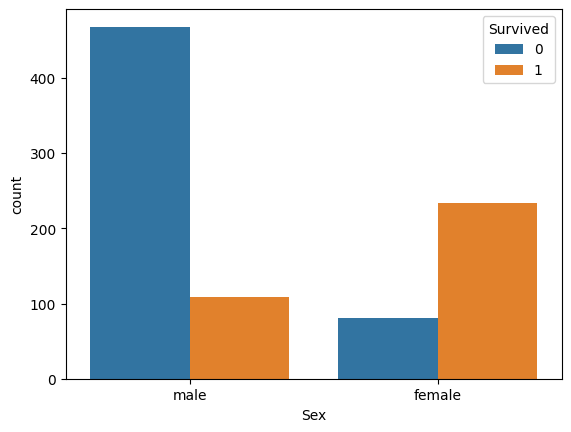

In [16]:
sns.countplot(x='Sex', hue='Survived', data=train)
print("Survived :\n",train[train['Survived']==1]['Sex'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Sex'].value_counts())

1)In the above count plot we can see the survival of males and females.

2)From the above output we can observe that female survival rate is more than male.

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


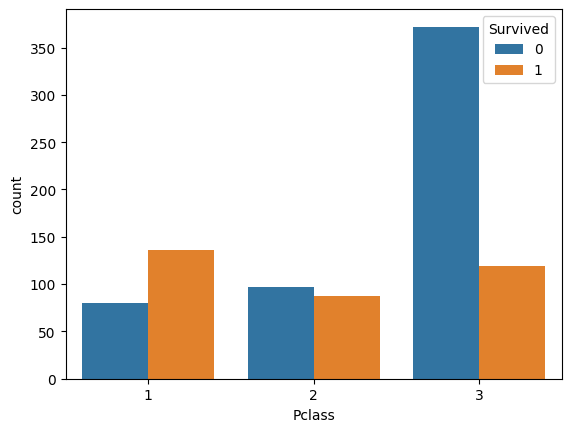

In [17]:
sns.countplot(x='Pclass', hue='Survived', data=train)
print("Survived :\n",train[train['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Pclass'].value_counts())

1)In the above count plot we can see the survival of the people in each passenger class (Pclass).

2)From the above output we can observe that survival of the 1st class people is more than the other two classes. In the 3rd class more people died.

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


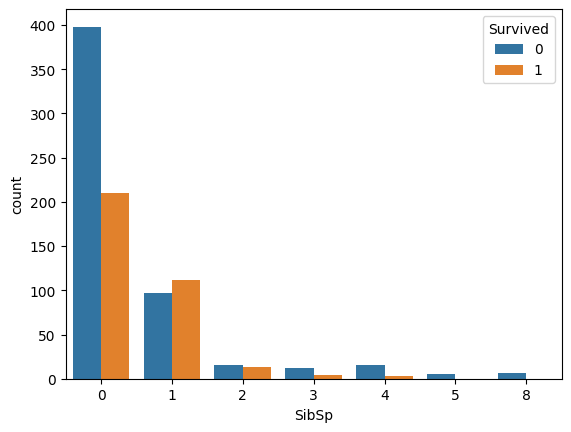

In [18]:
sns.countplot(x='SibSp', hue='Survived', data=train)
print("Survived :\n",train[train['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",train[train['Survived']==0]['SibSp'].value_counts())

1)In the above count plot we can see the survival of the people based on the no.of siblings or spouses they were travelling with on the Titanic.

2)From the above output we can observe that the people without siblings/spouses are more likely dead.

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


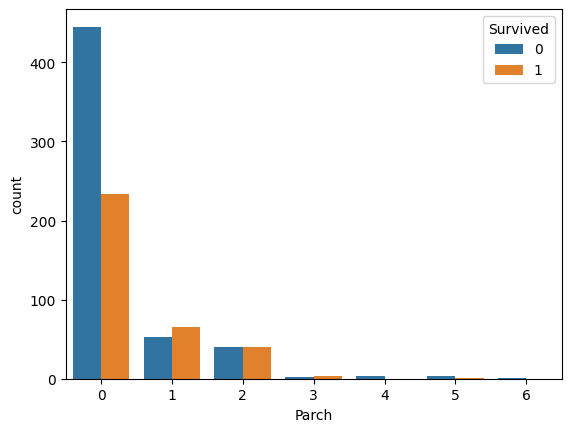

In [19]:
sns.countplot(x='Parch', hue='Survived', data=train)
print("Survived :\n",train[train['Survived']==1]['Parch'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Parch'].value_counts())

1)In the above count plot we can visualize the relationship between the Parch feature (no.of parents/children aboard the titanic) and survival.

2)From the above output we can observe that a person aboarded alone is more likely dead.

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


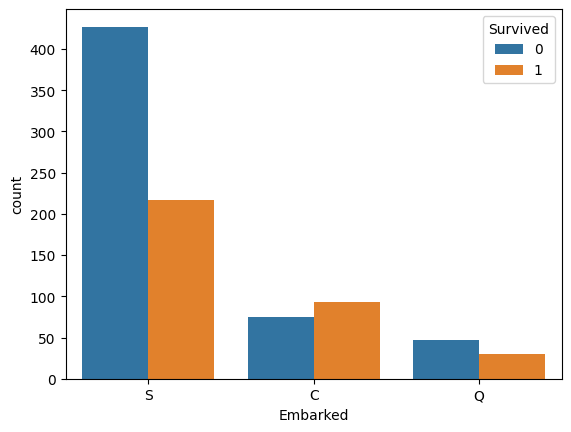

In [20]:
sns.countplot(x='Embarked', hue='Survived', data=train)
print("Survived :\n",train[train['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Embarked'].value_counts())

1)In the above count plot we can see the survival of the passengers based on the port from which they embarked.

2)From the above output we can observe that a person aboarded from C slightly more likely survived. A person aboarded from Q and S are more likely dead.

<ipython-input-21-5fdcecd2442f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True,cmap='coolwarm',cbar=True)


<Axes: >

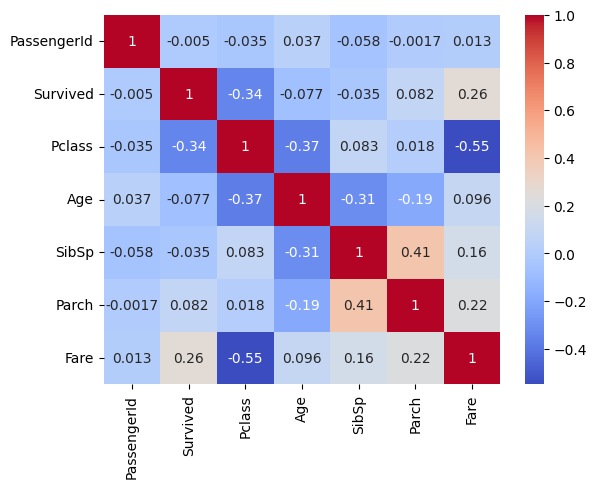

In [21]:
sns.heatmap(train.corr(),annot=True,cmap='coolwarm',cbar=True)

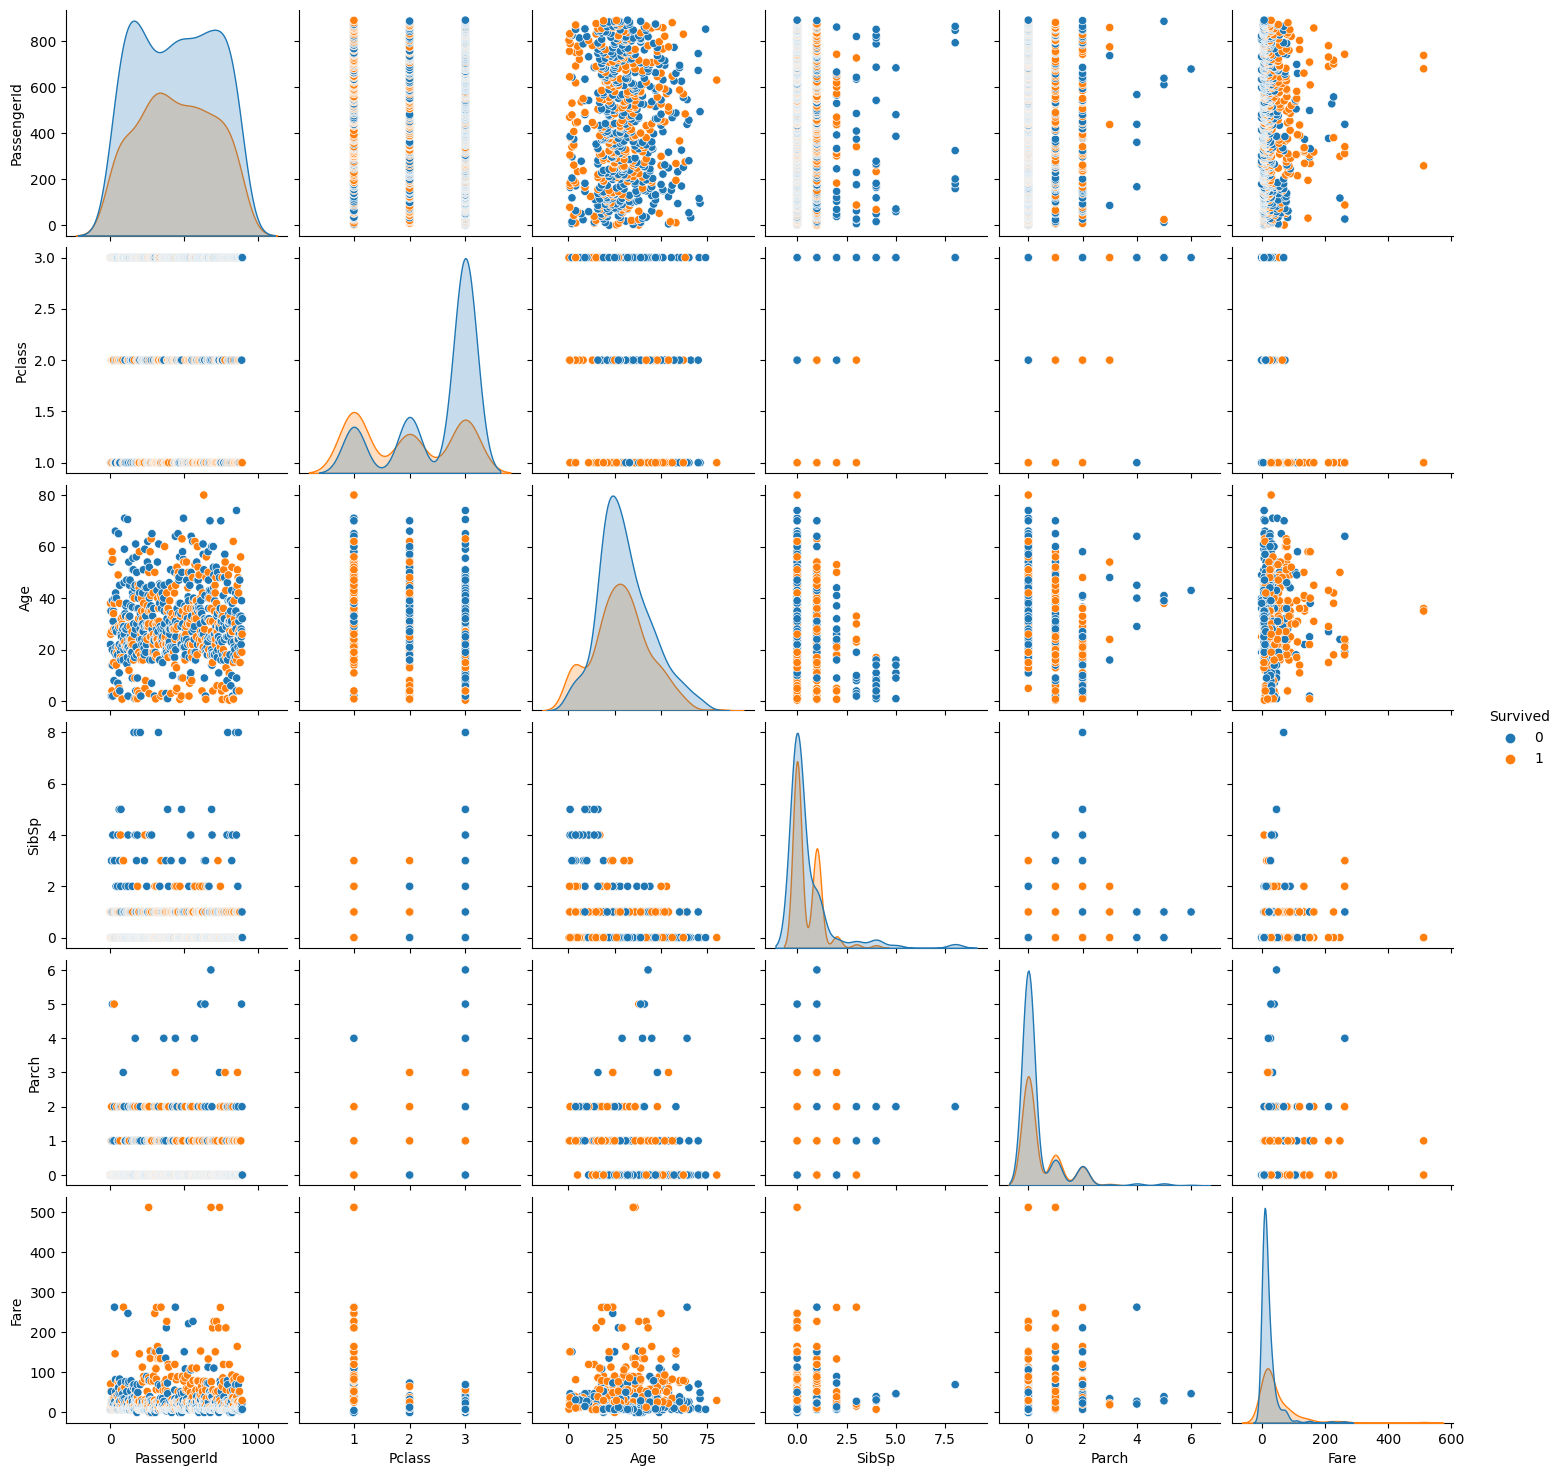

In [22]:
sns.pairplot(train,hue='Survived')

5)Feature Engineering

In [23]:
train_test_data = [train,test] # combine dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In the above code we are extracting the titles from the 'Name' column of both the training and testing datasets.Titles means 'Mr', 'Miss', 'Mrs', 'Master', etc.

In [24]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

The above code returns the count of unique values in the 'Title' column of the train dataframe. It counts the occurrences of each unique title present in the 'Title' column.

In [25]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [26]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)

Here we are converting the categorical values to numerical values.

In [27]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,,2


In [28]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,,2


<Axes: xlabel='Title', ylabel='count'>

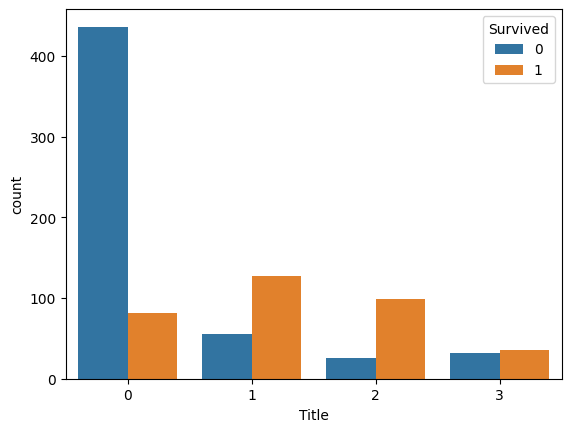

In [29]:
sns.countplot(x='Title',hue='Survived',data=train)

From the above chart we can understand the distribution of survival outcomes based on different titles.

We are dropping the 'Name' column from both training and testing datasets.

In [30]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)



In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


Data preprocessing

In [32]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

<Axes: xlabel='Sex', ylabel='count'>

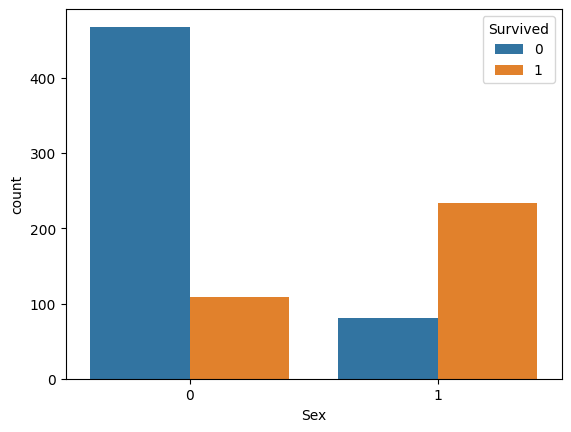

In [33]:
sns.countplot(x='Sex',hue='Survived',data=train)


In [34]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,,2


In [35]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace= True)
test["Age"].fillna(test.groupby('Title')['Age'].transform("median"), inplace= True)

In the above code, we are replacing the missing values in the 'Age' column with the median age corresponding to each individual's title group in the 'train'and 'test' dataset.

In [36]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In the above output we can see that no null values present in the Age column.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


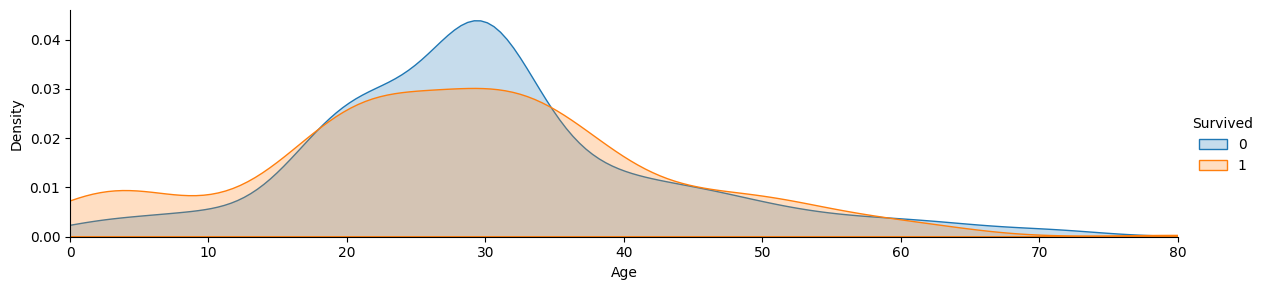

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(10.0, 50.0)

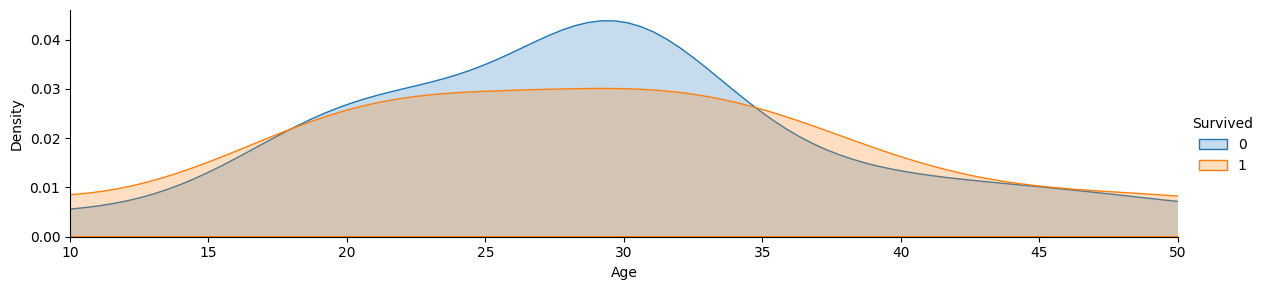

In [37]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(10,50)

From the above plots, we can see those who were 20 to 30 years old were more dead and more survived.

Converting the Numerical age to categorical variable. Child: 0 young: 1 adult: 2 mid-age: 3 senior: 4

In [38]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4

<Axes: xlabel='Age', ylabel='count'>

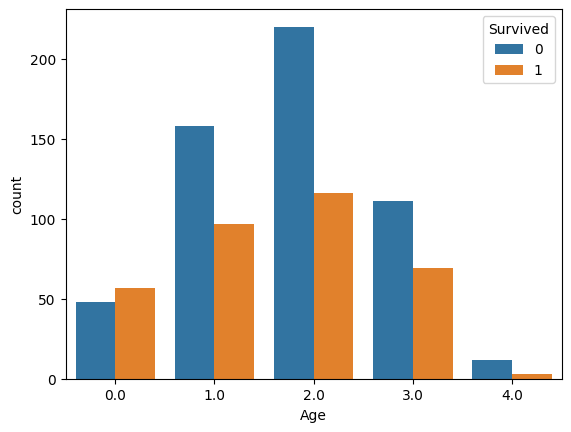

In [39]:
sns.countplot(x='Age',hue='Survived',data=train)

Pclass1:
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
Pclass2:
 S    164
C     17
Q      3
Name: Embarked, dtype: int64
Pclass3:
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


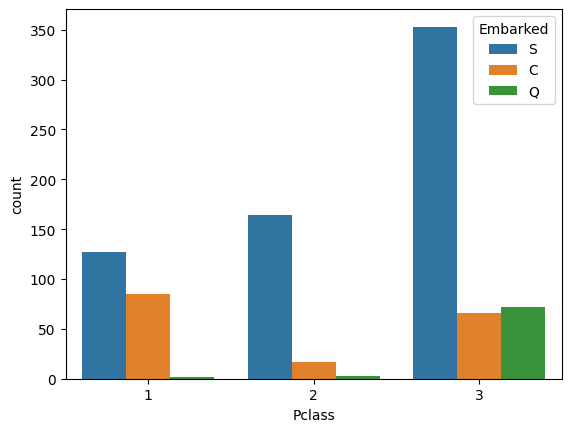

In [40]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
sns.countplot(x='Pclass',hue='Embarked',data=train)
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

In the above plot we can see how many people from each class are from S, C and Q embarks. We can observe that 1)more than 50 % of 1st class are from S embark. 2)more than 50 % of 2st class are from S embark. 3)more than 50 % of 3st class are from S embark.

We are replacing the null values in Embarked column with the S embark.

In [41]:
for dataset in train_test_data:
    dataset['Embarked'] =  dataset['Embarked'].fillna('S')

In the below output we can see that there are no null values for Embarked column.

In [42]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [43]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [44]:
# fill missing Fare with median fare for each Pclass
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


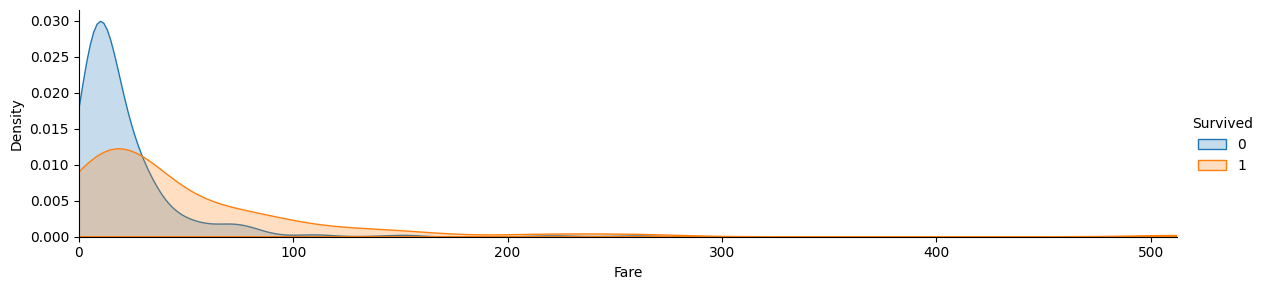

In [45]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

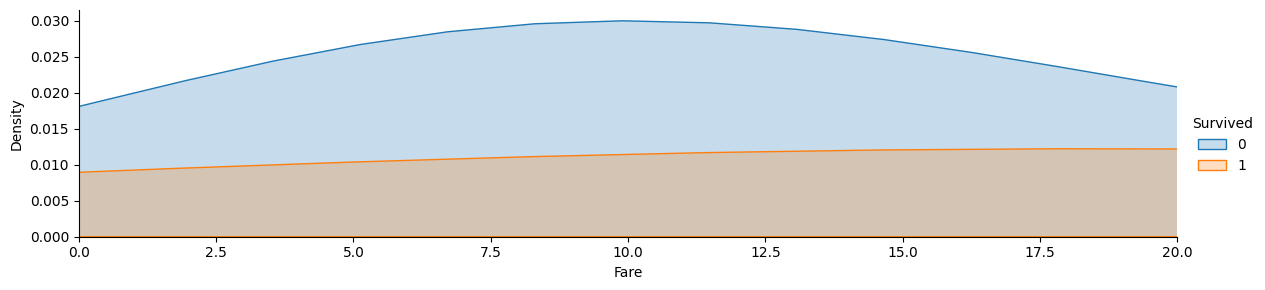

In [46]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

Here we are converting the continuous numerical data into discrete categories or groups.

In [47]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] >= 100, 'Fare'] = 3

In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


It counts the occurrence of each unique value in the 'Cabin' column.

In [49]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Here we are extracting the first character from each string in the 'Cabin' column.

In [50]:
for dataset in train_test_data:
    dataset['Cabin'] =  dataset['Cabin'].str[:1]

<Axes: >

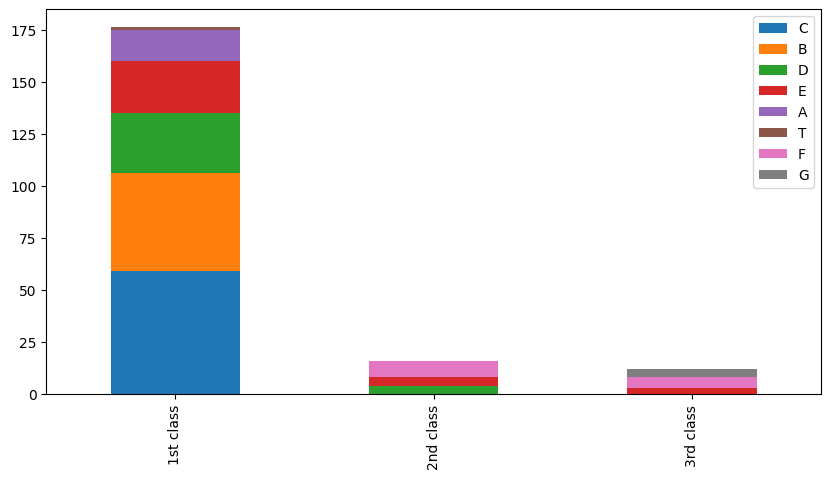

In [51]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

Here we are transforming the categorical values in Cabin column into numerical format.

In [52]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

This code fills the missing values in the 'Cabin' column based on the median 'Cabin' value within each 'Pclass' (passenger class).

In [53]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

It creates a new feature called "FamilySize" by summing up the number of siblings/spouses ('SibSp') and the number of parents/children ('Parch') for each passenger in the train and test datasets. Adding 1 to the sum accounts for the passenger themselves, resulting in the total size of the family or group traveling together.

In [54]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 11.0)

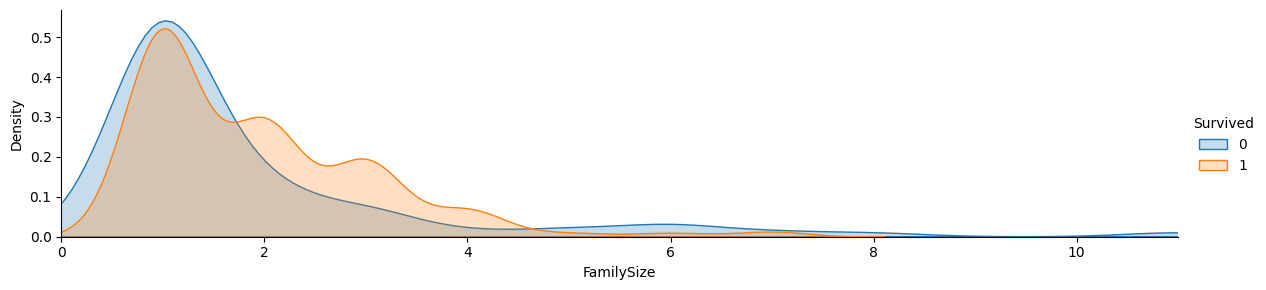

In [55]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

It creates categories or bins based on the family size values to group them into discrete levels or ranges.

In [56]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [58]:
features_drop = ['Ticket','SibSp','Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'], axis=1)

Split the training data

In [59]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']
train_data.shape, target.shape

((891, 8), (891,))

In [60]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


Modeling

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


K-fold Cross-Validation

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [64]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.7752809  0.82022472 0.83146067 0.85393258 0.83146067
 0.82022472 0.80898876 0.83146067 0.80898876]


In [65]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),LogisticRegression(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(),XGBClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

Score of Model 0 : 81.93
Score of Model 1 : 79.46
Score of Model 2 : 80.58
Score of Model 3 : 78.78
Score of Model 4 : 83.5
Score of Model 5 : 81.26
Score of Model 6 : 81.25
Score of Model 7 : 81.03
Score of Model 8 : 82.72


Hyperparameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10,100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize SVC
svc = SVC()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=k_fold, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_data, target)

# Print the best parameters found by Grid Search
print("Best Parameters for SVC:", grid_search.best_params_)

# Train SVC with the best parameters
best_svc = grid_search.best_estimator_
best_svc.fit(train_data, target)

Best Parameters for SVC: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


SVC(C=1, gamma=1)

In [67]:
# Print the score of the model
scoring = 'accuracy'
score = cross_val_score(best_svc, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Model Score:", round(np.mean(score) * 100, 2))

Model Score: 83.61


In [68]:
# Assuming you've trained the best_svc using Grid Search (as shown in the previous code snippet)

test_data = test.drop(['Survived', 'PassengerId'], axis=1)
prediction = best_svc.predict(test_data)  # Using the best_svc model for predictions


prediction


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

Exploratory Data Analysis using sweetviz

In [69]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 61.7 MB/s eta 0:00:00


In [70]:
import sweetviz as sv
my_report = sv.analyze([train,"Train"],target_feat = 'Survived')
my_report.show_html("Report1.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Report1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Pickling The Model file For Deployment

In [71]:
import sklearn
print(sklearn.__version__)

1.2.2


In [72]:
import pickle
# Save the best SVC model using pickle.dump
with open('best_svc_save.pkl', 'wb') as file:
    pickle.dump(best_svc, file)

In [73]:
# Loading the best SVC model for predictions
with open('best_svc_save.pkl', 'rb') as file:
    loaded_svc_model = pickle.load(file)

# Predict on the same test_data after pickling
prediction_result_after_pickling = loaded_svc_model.predict(test_data)

# Check if the predictions are the same as before pickling
if all(prediction == prediction_result_after_pickling):
    print("Predictions before and after pickling are the same.")
else:
    print("Predictions before and after pickling differ.")

Predictions before and after pickling are the same.
